In [54]:
import pandas as pd
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import scipy.io
import h5py

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [27]:
img_list = glob.glob("../Data/Rijksmuseum/jpg2/*.jpg")

In [28]:
img = cv2.imread(img_list[0])

In [29]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [34]:
sift = cv2.SIFT_create()
# kp = sift.detect(gray, None)
kp, des = sift.detectAndCompute(gray,None)

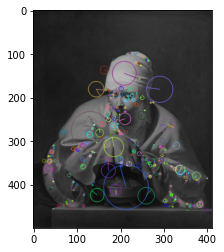

In [35]:
img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

In [67]:
des

array([[  0.,   0.,   0., ...,  27.,   1.,   1.],
       [ 37.,   1.,   0., ...,  48.,  41.,  15.],
       [  3.,   1.,   0., ...,   5.,   5.,   2.],
       ...,
       [111.,   1.,   0., ...,   0.,   0.,   0.],
       [ 23.,   1.,   0., ...,  35.,   0.,   0.],
       [  7.,   2.,   0., ...,   6.,   7.,   2.]], dtype=float32)

In [33]:
help(cv2.SIFT_create)

Help on built-in function SIFT_create:

SIFT_create(...)
    SIFT_create([, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]) -> retval
    .   @param nfeatures The number of best features to retain. The features are ranked by their scores
    .       (measured in SIFT algorithm as the local contrast)
    .   
    .       @param nOctaveLayers The number of layers in each octave. 3 is the value used in D. Lowe paper. The
    .       number of octaves is computed automatically from the image resolution.
    .   
    .       @param contrastThreshold The contrast threshold used to filter out weak features in semi-uniform
    .       (low-contrast) regions. The larger the threshold, the less features are produced by the detector.
    .   
    .       @note The contrast threshold will be divided by nOctaveLayers when the filtering is applied. When
    .       nOctaveLayers is set to default and if you want to use the value used in D. Lowe paper, 0.03, set
    .     

In [42]:
mat = scipy.io.loadmat('../Data/Rijksmuseum/matlab/rijksFV16.mat')

NotImplementedError: Please use HDF reader for matlab v7.3 files

In [53]:
f = h5py.File('../Data/Rijksmuseum/matlab/rijksFV16.mat','r')
dataX = f.get('X')
dataXn = f.get('Xn')
dataX = np.array(dataX) # For converting to a NumPy array
dataXn = np.array(dataXn)

In [52]:
f.keys()

<KeysViewHDF5 ['X', 'Xn']>

In [55]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [56]:
svc = SVC()
o_vs_r = OneVsRestClassifier(svc)

In [57]:
o_vs_r.fit(X, y)

OneVsRestClassifier(estimator=SVC())

In [58]:
yhat = o_vs_r.predict(X)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
len(dataX)

112039